### Data Generation

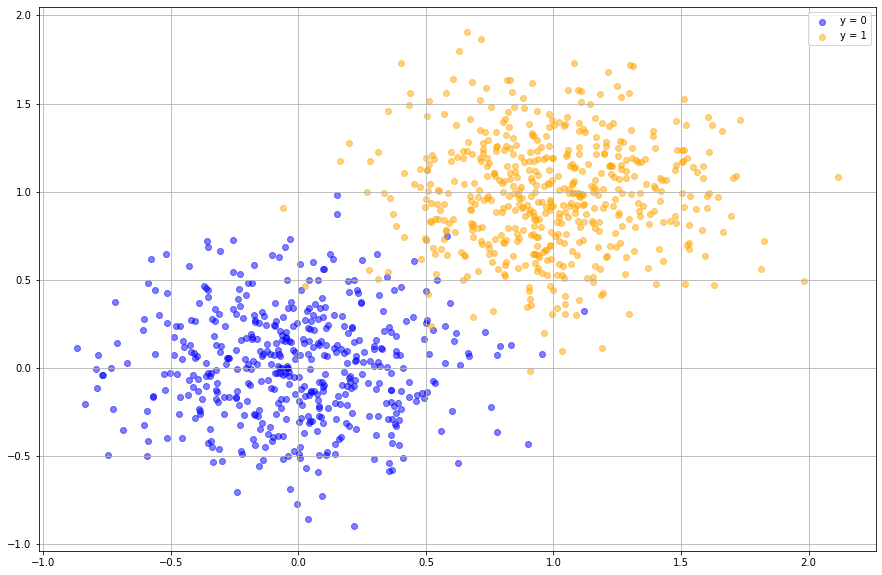

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

def get_xi1_and_xi2(y):
    mean = [y, y]
    cov = [[0.1, 0], [0, 0.1]]
    return np.random.multivariate_normal(mean, cov, 1)
    
y_sample = [0, 1]
yi_set = []
xi_set_for_0 = []
xi_set_for_1 = []
set_without_classify = []

for i in range(1000):
    yi = random.choice(y_sample)
    
    temp = get_xi1_and_xi2(yi)
    temp = np.append(temp, yi)
    
    set_without_classify.append(temp)
    
    if yi == 0:
        xi_set_for_0.append(temp)
    else:
        xi_set_for_1.append(temp)
        
xi_set_for_0_T = np.transpose(xi_set_for_0)
xi_set_for_1_T = np.transpose(xi_set_for_1)

plt.figure(figsize=(15,10))
plt.scatter(xi_set_for_0_T[0], xi_set_for_0_T[1], color="blue", alpha=0.5, label="y = 0")
plt.scatter(xi_set_for_1_T[0], xi_set_for_1_T[1], color="orange", alpha=0.5, label="y = 1")
plt.legend()
plt.grid(True)
plt.show()

### Model Construction

0.984


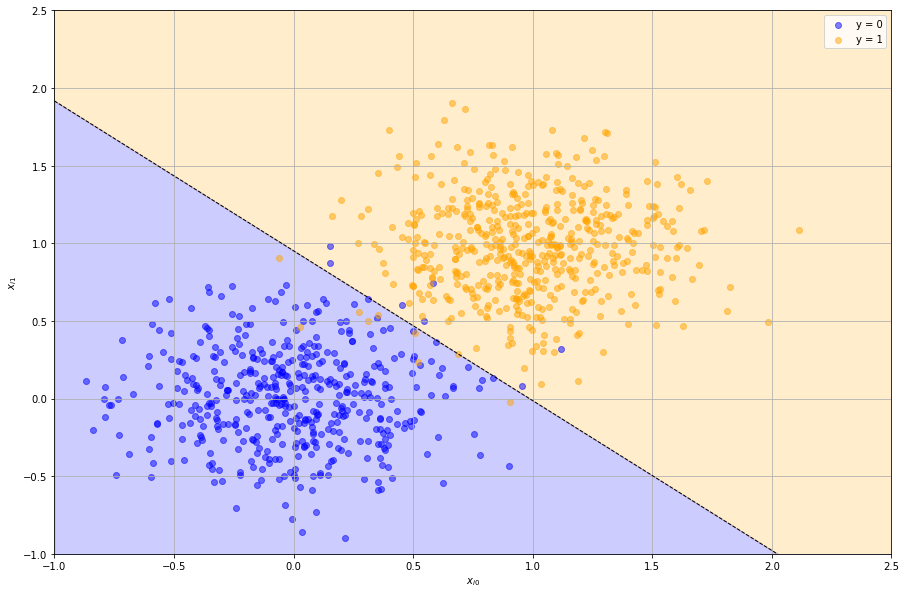

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dataset = np.transpose(set_without_classify)
x_temp = [dataset[0], dataset[1]]
X = np.transpose(x_temp)

clf = LogisticRegression().fit(X, dataset[2])
predict = clf.predict(X)
acc = accuracy_score(dataset[2], predict)
print(acc)


b = clf.intercept_[0]
w1, w2 = clf.coef_.T

c = -b/w2
m = -w1/w2

xmin, xmax = -1, 2.5
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.show()

plt.figure(figsize=(15,10))

plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='orange', alpha=0.2)

plt.scatter(xi_set_for_0_T[0], xi_set_for_0_T[1], color="blue", alpha=0.5, label="y = 0")
plt.scatter(xi_set_for_1_T[0], xi_set_for_1_T[1], color="orange", alpha=0.5, label="y = 1")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_{i1}$')
plt.xlabel(r'$x_{i0}$')
plt.legend()
plt.grid(True)
plt.show()